#<b> Computer Vision </b>

# Initial Setup

In [ ]:
## Installing PyDrive for fetching data from public google drive links
!pip install PyDrive

In [ ]:
## Importing required libraries
import numpy as np
import os
from google.colab import files
%tensorflow_version 2.x
import tensorflow
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

# Part 1

In [1]:
## Downloading images.npy file from given drive link
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
## File URL - https://drive.google.com/file/d/1saZ-xa27Sr8iWOjh9qy5HPwgu1GHRki8/view
downloaded = drive.CreateFile({'id':"1saZ-xa27Sr8iWOjh9qy5HPwgu1GHRki8"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Part 1- Train data - images.npy') ## Saves file to working directory

In [4]:
## Loading npy file data 
data=np.load('Part 1- Train data - images.npy',allow_pickle=True)

In [5]:
## Display data shape
data.shape

(409, 2)

In [6]:
## Display sample data
data[20][1]

[{'imageHeight': 360,
  'imageWidth': 480,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.4979166666666667, 'y': 0.20833333333333334},
   {'x': 0.7854166666666667, 'y': 0.6888888888888889}]}]

In [7]:
# Setting default image size
img_size=224

In [9]:
## Separating masks and input image data
masks=np.zeros((int(data.shape[0]),img_size, img_size))
X=np.zeros((int(data.shape[0]),img_size, img_size,3))
for index in range(data.shape[0]):
  img=data[index][0]
  # resizing to default size
  img=cv2.resize(img,dsize=(img_size,img_size))
  try:
    img=img[:,:,:3]
  except:
    continue
  X[index]= preprocess_input(np.array(img, dtype=np.float32))
  for i in data[index][1]:
    x1=int(i["points"][0]['x'] * img_size)
    x2=int(i["points"][1]['x'] * img_size)
    y1=int(i["points"][0]['y'] * img_size)
    y2=int(i["points"][1]['y'] * img_size)
    masks[index][y1:y2,x1:x2]=1


In [10]:
# Display shape of Image array
X.shape

(409, 224, 224, 3)

In [14]:
X[10]

array([[[-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]],

       [[-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]],

       [[-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]],

       ...,

       [[-1.        , -1.        , -1.        ],
        [-1

In [11]:
## Displaying masked image shape
masks.shape

(409, 224, 224)

In [12]:
## Displaying shape of random masked image 
masks[10].shape

(224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


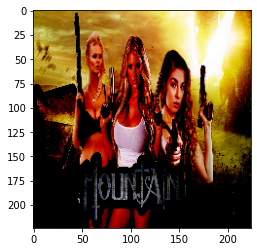

In [20]:
## Displaying random image data
import matplotlib.pyplot as plt
plt.imshow(X[100])

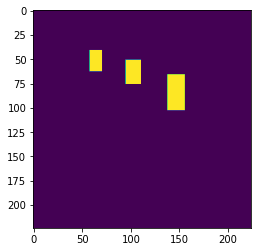

In [21]:
## Displaying corresponding masks image
plt.imshow(masks[100])

In [22]:
## Splitting data into train and test ( 400 Train images 9 test images)
X_train=X[:400]
y_train=masks[:400]
X_test=X[400:]
y_test=masks[400:]

In [23]:
X_train.shape

(400, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


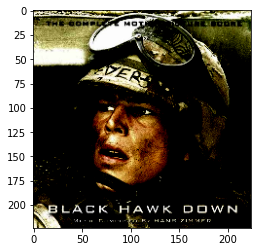

In [28]:
# Displaying random train image
plt.imshow(X_train[95])

In [30]:
## Displaying corresponding image data array
X_train[95]

array([[[ 0.03529418,  0.01176476, -0.23137254],
        [-0.09803921, -0.12156862, -0.38039213],
        [ 0.23921573,  0.21568632, -0.04313725],
        ...,
        [ 0.95294118,  0.93725491,  0.72549021],
        [ 0.98431373,  0.96078432,  0.81960785],
        [ 0.98431373,  0.95294118,  0.86666667]],

       [[ 0.56078434,  0.52941179,  0.34901965],
        [ 0.38039219,  0.34901965,  0.16078436],
        [ 0.43529415,  0.41176474,  0.20784318],
        ...,
        [ 0.82745099,  0.82745099,  0.58431375],
        [ 0.8509804 ,  0.84313726,  0.66274512],
        [ 0.74117649,  0.71764708,  0.59215689]],

       [[ 0.98431373,  0.96078432,  0.87450981],
        [ 0.83529413,  0.80392158,  0.7019608 ],
        [ 0.80392158,  0.78039217,  0.65490198],
        ...,
        [ 0.7647059 ,  0.7647059 ,  0.59215689],
        [ 0.92156863,  0.9137255 ,  0.78039217],
        [ 0.92156863,  0.90588236,  0.80392158]],

       ...,

       [[ 0.92941177,  0.95294118,  0.7019608 ],
        [ 0

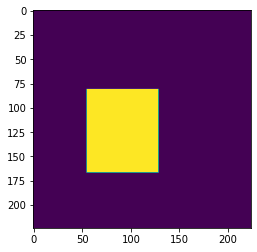

In [32]:
# Displaying corresponding mark image 
plt.imshow(y_train[95])

In [33]:
## Importing MobileNet as a pretrained model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
## Displaying mobileNet layers
mn_model=MobileNet(input_shape=(img_size, img_size, 3), include_top=False, alpha=1.0, weights="imagenet")
mn_model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [47]:
# Using the above mobilenet layers to create a U net
def create_model(trainable=True):
    model = mn_model

    for layer in model.layers:
        layer.trainable = trainable
  
    ## Choosing relu activation layers output for layers which downsized the image
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output
    # Concatenating the same layers at the end of mobilenet with upsampling
    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((img_size, img_size))(x)
    ## Returning the U net model with pretrained transfer learning encoder and created decoder
    return Model(inputs=model.input, outputs=x)

In [48]:
## Calling the create model function with trainable set to false
model = create_model(False)

In [49]:
## Displaying Unet model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
____________________________________________________________________________________________

In [50]:
## Creating a custom dice coefficient
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [51]:
## Creating a custom loss function
from tensorflow.keras.losses import binary_crossentropy
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.math.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

In [52]:
## Compiling model using adam optimiser
from tensorflow.keras.optimizers import Adam
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

In [53]:
## Creating callbacks to save the best model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=False)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

In [55]:
# fitting the model on train set
model.fit(X_train, y_train, batch_size=10, epochs=20,
    validation_data=(X_test, y_test),
    callbacks = [checkpoint, stop, reduce_lr])

Epoch 1/20
40/40 [==============================] - 219s 5s/step - loss: 0.9689 - dice_coefficient: 0.5179 - val_loss: 0.7553 - val_dice_coefficient: 0.5620

Epoch 00001: val_loss improved from inf to 0.75529, saving model to model-0.76.h5
Epoch 2/20
40/40 [==============================] - 211s 5s/step - loss: 0.8374 - dice_coefficient: 0.5644 - val_loss: 0.6800 - val_dice_coefficient: 0.6004

Epoch 00002: val_loss improved from 0.75529 to 0.68003, saving model to model-0.68.h5
Epoch 3/20
40/40 [==============================] - 218s 5s/step - loss: 0.7875 - dice_coefficient: 0.5868 - val_loss: 0.6320 - val_dice_coefficient: 0.6308

Epoch 00003: val_loss improved from 0.68003 to 0.63197, saving model to model-0.63.h5
Epoch 4/20
40/40 [==============================] - 214s 5s/step - loss: 0.7520 - dice_coefficient: 0.6015 - val_loss: 0.6188 - val_dice_coefficient: 0.6396

Epoch 00004: val_loss improved from 0.63197 to 0.61878, saving model to model-0.62.h5
Epoch 5/20
40/40 [==========

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


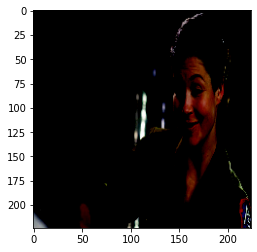

In [56]:
## Displaying a sample test image
plt.imshow(X_test[5])

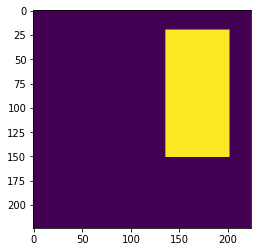

In [58]:
## Displaying mask for the above image
plt.imshow(y_test[5])

In [59]:
## Evaluating the model
model.evaluate(X_test,y_test)

1/1 [==============================] - 5s 5s/step - loss: 0.5986 - dice_coefficient: 0.6563


[0.5985553860664368, 0.6562557220458984]

In [63]:
##  Loading the best saved model
from tensorflow.keras.models import load_model
# Load the model from the HDF5 file saved previously
loaded_model = load_model('model-0.60.h5', custom_objects={'loss': loss,'dice_coefficient':dice_coefficient})

In [65]:
## Creating prediction
y_pred=model.predict(X_test)

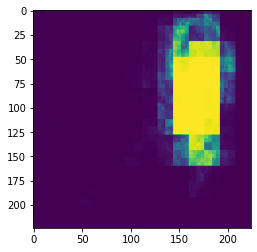

In [66]:
## Displaying predicted mask
plt.imshow(y_pred[5])

In [67]:
## Creating prediction data for test data
y_pred_l=loaded_model.predict(X_test)

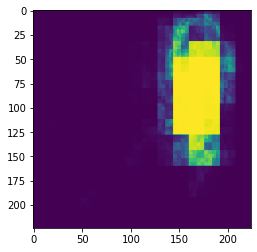

In [68]:
## Displaying predicted mask
plt.imshow(y_pred_l[5])

<b> It can be clearly seen that the predicted mask for test image is same as the actual mask</b>

In [93]:
## Uploading the image to be tested
files.upload()

Saving Prediction.jpeg to Prediction (1).jpeg


{'Prediction.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x01\xf4\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xe9\xe4s\xbag\x9f\xe7:^g\xaf\x07w<G{\xcf\xb5WK$\xb5\xa5\x91\xc2H\xc9c\xcc\xdb4{\xcaH/N:\x1d\x1f7\xd0\xf2\xdd\x97\xd7^V\xc25\x83\xdd\x04\x87-\x9d~\x97l\xca\xd7\xb3\xae\x08\xa5\x82Xa\xb2\xdc\xee\x1bUy\xack~\x0ez>}7\xd7\x18:\xcb\xfce\x8bz\xe7U\xb7

In [94]:
## Preformatting the image
prediction_img = cv2.imread('Prediction.jpeg')
prediction_img = cv2.resize(prediction_img, (img_size, img_size))
prediction_img = cv2.cvtColor(prediction_img, cv2.COLOR_BGR2RGB)

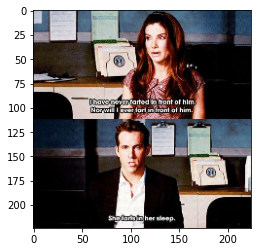

In [95]:
## Displaying the image
plt.imshow(prediction_img);

In [96]:
## Formatting the image data for model
X_pred= prediction_img/255
X_pred.shape

(224, 224, 3)

In [97]:
## Predicting the mask using model
X_pred = np.reshape(X_pred,[1,img_size,img_size,3])
pred_img=loaded_model.predict(X_pred)
pred_img.shape

(1, 224, 224)

In [98]:
pred_img=np.reshape(pred_img,[img_size,img_size])
pred_img.shape

(224, 224)

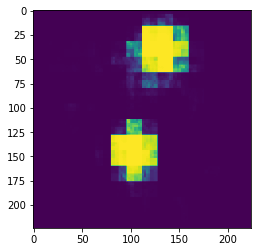

In [99]:
## Displaying the mask image
plt.imshow(pred_img);

It can be clearly seen that the model has predicted the masks at the right places

In [108]:
## Removing he npy file not required anymore
! rm 'Part 1- Train data - images.npy'

# Part 2

We download the Zipfile, unzip it and then delete the zipfile

In [102]:
##Zip file URL https://drive.google.com/file/d/1SG-xx_aPyHsF5S1k95jQFzoNiceoTs0T/view
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
zipfile = drive.CreateFile({'id':"1SG-xx_aPyHsF5S1k95jQFzoNiceoTs0T"})   # replace the id with id of file you want to access
zipfile.GetContentFile('Part 2 - training images.zip')

In [ ]:
! unzip 'Part 2 - training images.zip'

In [109]:
! rm 'Part 2 - training images.zip'

In [1]:
## Importing required libraries
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
## Fetching face cascade function from cv2 haarcascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
##  setting the folder path
file_path = '/content/training_images'
count = 0
## Setting default image size
image_size=300
x = []
y = []
w = []
h = []
no_of_faces = []
image_name = []

for f in os.listdir(file_path):
  count += 1
  image_path = os.path.join(file_path, f)
  img = cv2.imread(image_path)
  img = cv2.resize(img,(image_size,image_size))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 5)
  ## if faces are not detected- set x,y,w,z as none
  if faces is ():
    x.append(None)
    y.append(None)
    w.append(None)
    h.append(None)
    no_of_faces.append(0)
    image_name.append(f)
  else:
    if len(faces)>1:
      temp_x = []
      temp_y = []
      temp_w = []
      temp_h = []
    
      for i in range(len(faces)):
        temp_x.append(faces[i][0])
        temp_y.append(faces[i][1])
        temp_w.append(faces[i][2])
        temp_h.append(faces[i][3])

      x.append(temp_x)
      y.append(temp_y)
      w.append(temp_w)
      h.append(temp_h)
      no_of_faces.append(len(faces))
      image_name.append(f)

    else:
      x.append(faces[0][0])
      y.append(faces[0][1])
      w.append(faces[0][2])
      h.append(faces[0][3])
      no_of_faces.append(len(faces))
      image_name.append(f)


In [4]:
## Creating data frame based on detected x,y,w,z,Total_faces
import pandas as pd
d = {'x':x, 'y':y, 'w':w, 'h':h, 'Total_faces':no_of_faces, 'Image_Name':image_name}

df1 = pd.DataFrame(d)

In [5]:
## Showing count of detected faces
df1.Total_faces.value_counts()

1    861
0    211
2     19
Name: Total_faces, dtype: int64

In [8]:
df1.tail()

,x,y,w,h,Total_faces,Image_Name
1086,None,None,None,None,0,real_00800.jpg
1087,"[54, 18]","[79, 49]","[73, 236]","[73, 236]",2,real_00285.jpg
1088,50,55,222,222,1,real_00938.jpg
1089,31,64,205,205,1,real_00819.jpg
1090,60,66,203,203,1,real_01040.jpg


In the above df, we can see image real_00800 has 0 faces. 

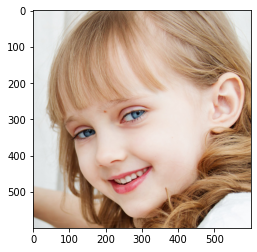

In [10]:
img = cv2.imread('/content/training_images/real_00800.jpg')
img = cv2.cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

But checking the image, we see there is a face, hence the model is not 100% accurate. So we create another dataframe with slightly modified values to compensate 

In [12]:
df2=df1.copy()

In [33]:
## Using mode values instaad of none for undetected faces
x_mode=df2.x.mode()[0]
y_mode=df2.y.mode()[0]
w_mode=df2.h.mode()[0]
h_mode=df2.w.mode()[0]

In [34]:
df2["x"].fillna(x_mode, inplace = True) 
df2["y"].fillna(y_mode, inplace = True)
df2["w"].fillna(w_mode, inplace = True)
df2["h"].fillna(h_mode, inplace = True)

In [38]:
df2['Total_faces']=df2['Total_faces'].replace(0,1)

In [39]:
df2.tail()

,x,y,w,h,Total_faces,Image_Name
1086,39,64,198,198,1,real_00800.jpg
1087,"[54, 18]","[79, 49]","[73, 236]","[73, 236]",2,real_00285.jpg
1088,50,55,222,222,1,real_00938.jpg
1089,31,64,205,205,1,real_00819.jpg
1090,60,66,203,203,1,real_01040.jpg


This dataframe can now be used to train models

In [41]:
print(df2.Total_faces.value_counts())

1    1072
2      19
Name: Total_faces, dtype: int64


# Part 3

In [2]:
## zipfile URL- https://drive.google.com/file/d/1uZfN_ViY8E6ypUk4ZJEdKTybTh8Nm6DA/view
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
face_dataset = drive.CreateFile({'id':"1uZfN_ViY8E6ypUk4ZJEdKTybTh8Nm6DA"})   # replace the id with id of file you want to access
face_dataset.GetContentFile('Part 3 - Aligned Face Dataset from Pinterest.zip')

In [ ]:
! unzip 'Part 3 - Aligned Face Dataset from Pinterest.zip' -d face_dataset

In [5]:
ls

 adc.json       'Part 3 - Aligned Face Dataset from Pinterest.zip'
 face_dataset/   sample_data/


In [6]:
! rm 'Part 3 - Aligned Face Dataset from Pinterest.zip'

In [7]:
cd face_dataset

/content/face_dataset


In [34]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

Loading the dataset and creating the metadata.

In [35]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [36]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

Checking some samples of metadata.

In [37]:
sample_img=load_image(metadata[10].image_path())

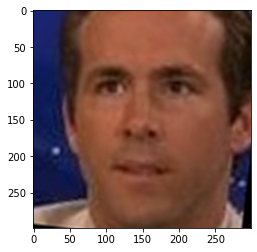

In [38]:
plt.imshow(sample_img)

Loading the pre-trained model and weights.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [27]:
## For the model weights - https://drive.google.com/file/d/1rx5gAZvHqGkGsfzWz2D5cOijKFrrXzP4/view
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
model_weights = drive.CreateFile({'id':"1rx5gAZvHqGkGsfzWz2D5cOijKFrrXzP4"})   # replace the id with id of file you want to access
model_weights.GetContentFile('Part 3 - vgg_face_weights.h5')

In [40]:
model = vgg_face()
model.load_weights('Part 3 - vgg_face_weights.h5')

In [41]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Generate Embedding vectors for each face in the dataset.

(224, 224, 3)
(2622,)


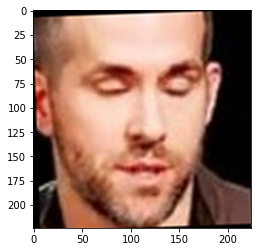

In [42]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)
plt.imshow(img)
# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

In [43]:
# Get embedding vectors for all images in the metadata using the pre-trained model
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  img_path = metadata[i].image_path()
  img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

In [44]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

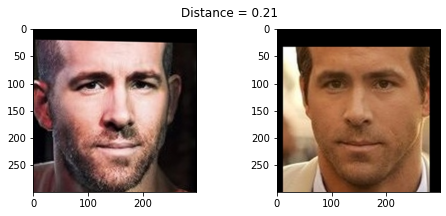

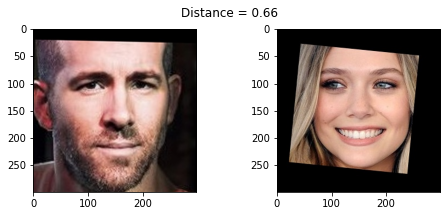

In [45]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

In [46]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print('y_train before encoding:',y_train[0])
y_train = le.fit_transform(y_train)
print('y_train before encoding:',y_train[0])

print('y_test before encoding:',y_test[0])
y_test = le.fit_transform(y_test)
print('y_test before encoding:',y_test[0])

y_train before encoding: pins_Ryan Reynolds
y_train before encoding: 50
y_test before encoding: pins_Ryan Reynolds
y_test before encoding: 50


In [48]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

print('X_train before scaling:',X_train[0])
X_train_scaled = sc.fit_transform(X_train)
print('X_train before scaling:',X_train_scaled[0])

print('X_test before scaling:',X_test[0])
X_test_scaled = sc.fit_transform(X_test)
print('X_test before scaling:',X_test_scaled[0])

X_train before scaling: [ 0.01874804 -0.00488773 -0.01531635 ... -0.01632139  0.00234246
  0.00612361]
X_train before scaling: [ 0.82827125 -0.38821562 -1.73123022 ... -0.17698774 -0.33899301
 -0.56757382]
X_test before scaling: [ 0.01875868 -0.01732215  0.02164357 ... -0.00804071  0.00352578
  0.02857203]
X_test before scaling: [ 0.825361   -1.45349988  1.79033602 ...  0.60984796 -0.22642888
  1.11974291]


In [49]:
from sklearn.decomposition import PCA

pca = PCA()

pca = PCA(n_components = 128) 
pca.fit(X_train_scaled) 
X_train_pca = pca.transform(X_train_scaled)

pca.fit(X_test_scaled) 
X_test_pca = pca.transform(X_test_scaled)

In [50]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_pca,y_train)
y_pred = svm.predict(X_test_pca)
print('Training Accuracy of the SVM model is:',svm.score(X_train_pca, y_train))
print('Testing Accuracy of the SVM model is:',svm.score(X_test_pca, y_test))

Training Accuracy of the SVM model is: 0.9959260419931056
Testing Accuracy of the SVM model is: 0.04594820384294068


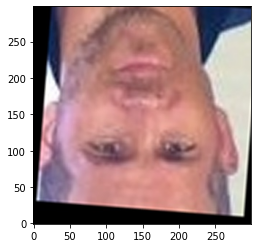

In [51]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())

plt.imshow(example_image, origin='lower')

In [52]:
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
example_image = (example_image / 255.).astype(np.float32)

example_image = cv2.resize(example_image, dsize = (224,224))
print(example_image.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [53]:
print('Embedding vector before scaling:', embedding_vector)
vec = sc.fit_transform(embedding_vector.reshape(1,-1))
print('Embedding vector after scaling:', vec)

Embedding vector before scaling: [ 0.02516129 -0.0058927  -0.00500518 ... -0.02383813  0.01094151
  0.00445929]
Embedding vector after scaling: [[0. 0. 0. ... 0. 0. 0.]]


In [54]:
vec = np.array(vec)
vec.resize(1,128)

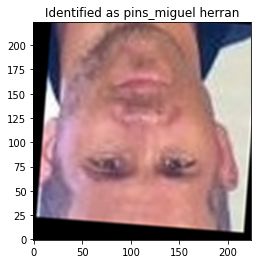

In [55]:

example_prediction = svm.predict(vec)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image, origin='lower')
plt.title(f'Identified as {example_identity}');

In [56]:
svm1 = SVC()
svm1.fit(X_train,y_train)
y_pred1 = svm1.predict(X_test)
print('Training Accuracy of the SVM model is:',svm1.score(X_train, y_train))
print('Testing Accuracy of the SVM model is:',svm1.score(X_test, y_test))

Training Accuracy of the SVM model is: 0.9942546746056617
Testing Accuracy of the SVM model is: 0.9724310776942355


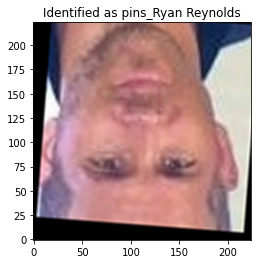

In [57]:
vec = np.array(embedding_vector)
vec = vec.reshape(1,-1)

example_prediction = svm1.predict(vec)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image, origin='lower')
plt.title(f'Identified as {example_identity}');

In [58]:
svm2 = SVC()
svm2.fit(X_train_scaled,y_train)
y_pred1 = svm2.predict(X_test_scaled)
print('Training Accuracy of the SVM model is:',svm2.score(X_train_scaled, y_train))
print('Testing Accuracy of the SVM model is:',svm2.score(X_test_scaled, y_test))

Training Accuracy of the SVM model is: 0.9972840279954037
Testing Accuracy of the SVM model is: 0.9707602339181286


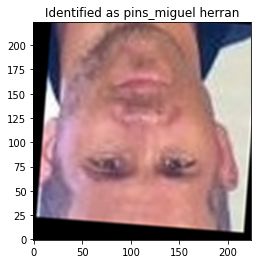

In [59]:
vec = np.array(embedding_vector)
vec = vec.reshape(1,-1)

example_prediction = svm2.predict(vec)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image, origin='lower')
plt.title(f'Identified as {example_identity}');

# Part 4

For Video object detection, we use imageai library.


In [ ]:
! pip install --upgrade imageai

In [ ]:
# Mounting google drive where we have saved the yolo model and a short video of choice.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Copying the model and video to current working directory
cp '/content/drive/MyDrive/yolo.h5' '/content/'
cp '/content/drive/MyDrive/Colab Notebooks/traffic-mini.mp4' '/content/'

In [ ]:
## Using VideoObjectDetection class
from imageai.Detection import VideoObjectDetection
import os
# getting current working directory
execution_path = os.getcwd()
# creating an instance of VideoObjectDetection class
detector = VideoObjectDetection()
#set the model type to YOLOv3
detector.setModelTypeAsYOLOv3()
# set model path
detector.setModelPath( os.path.join(execution_path , "/content/yolo.h5"))
# laoding the model
detector.loadModel()

## Calling fucntion detectObjectsFromVideo
video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join( execution_path, "/content/traffic-mini.mp4"),
                                output_file_path=os.path.join(execution_path, "detected_traffic")
                                , frames_per_second=29, log_progress=True)
print(video_path)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  